In [3]:
%load_ext autoreload
%autoreload 2

In [ ]:
from datetime import datetime, timedelta
from control.modules.high_temperature import (
    HighTemperatureControl,
    HighTemperatureParameters,
    HighTemperatureAlarms,
)
from input_output.base import Stamped
from input_output.definitions.control import Valve
from input_output.definitions.simulation import (
    Boundary,
    HeatSource,
    Pcs,
    Thruster,
    ValvePosition,
)
from input_output.modules.high_temperature import (
   HighTemperatureControlValues,
   HighTemperatureSensorValues,
   HighTemperatureSimulationInputs,
   HighTemperatureSimulationOutputs,
)
from orchestration.simulator import Simulator, SimulatorModel
from simulation.models.fmu_paths import high_temperature_path


simulation_inputs = HighTemperatureSimulationInputs(
         thrusters_aft=Thruster(
            heat_flow=Stamped.stamp(0), active=Stamped.stamp(True)
        ),
        thrusters_fwd=Thruster(
            heat_flow=Stamped.stamp(0), active=Stamped.stamp(True)
        ),
        thrusters_seawater_supply=Boundary(
            temperature=Stamped.stamp(32), flow=Stamped.stamp(64)
        ),
        thrusters_pcs=Pcs(mode=Stamped.stamp("off")),
        pvt_main_fwd=HeatSource(heat_flow=Stamped.stamp(0)),
        pvt_main_aft=HeatSource(heat_flow=Stamped.stamp(0)),
        pvt_owners=HeatSource(heat_flow=Stamped.stamp(0)),
        pvt_pump_failure_switch_main_fwd=ValvePosition(
            position_rel=Stamped.stamp(Valve.CLOSED)
        ),
        pvt_pump_failure_switch_main_aft=ValvePosition(
            position_rel=Stamped.stamp(Valve.CLOSED)
        ),
        pvt_pump_failure_switch_owners=ValvePosition(
            position_rel=Stamped.stamp(Valve.CLOSED)
        ),
        pvt_seawater_supply=Boundary(
            temperature=Stamped.stamp(32), flow=Stamped.stamp(64)
        ),
        pcm_freshwater_supply=Boundary(
            temperature=Stamped.stamp(40), flow=Stamped.stamp(0)
        ),
        consumers_fahrenheit_supply=Boundary(
            temperature=Stamped.stamp(30), flow=Stamped.stamp(0)
        ),
        consumers_boosting_supply=Boundary(
            temperature=Stamped.stamp(30), flow=Stamped.stamp(0)
        ),
    )

control = HighTemperatureControl(HighTemperatureParameters())

high_temperature_model = SimulatorModel(
    fmu_path=high_temperature_path,
    sensor_values_cls=HighTemperatureSensorValues,
    control_values_cls=HighTemperatureControlValues,
    simulation_outputs_cls=HighTemperatureSimulationOutputs,
    simulation_inputs=simulation_inputs,
    control=control,
    alarms=HighTemperatureAlarms(),
    tick_duration=timedelta(seconds=1),
    start_time= datetime.fromtimestamp(0)
)

with high_temperature_model.executor() as executor:
    simulation = Simulator(high_temperature_model, executor)

    result = await simulation.run(300)

/Users/alje/Repos/zero-thrs-control/analysis/analysis_utils.py:194: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(


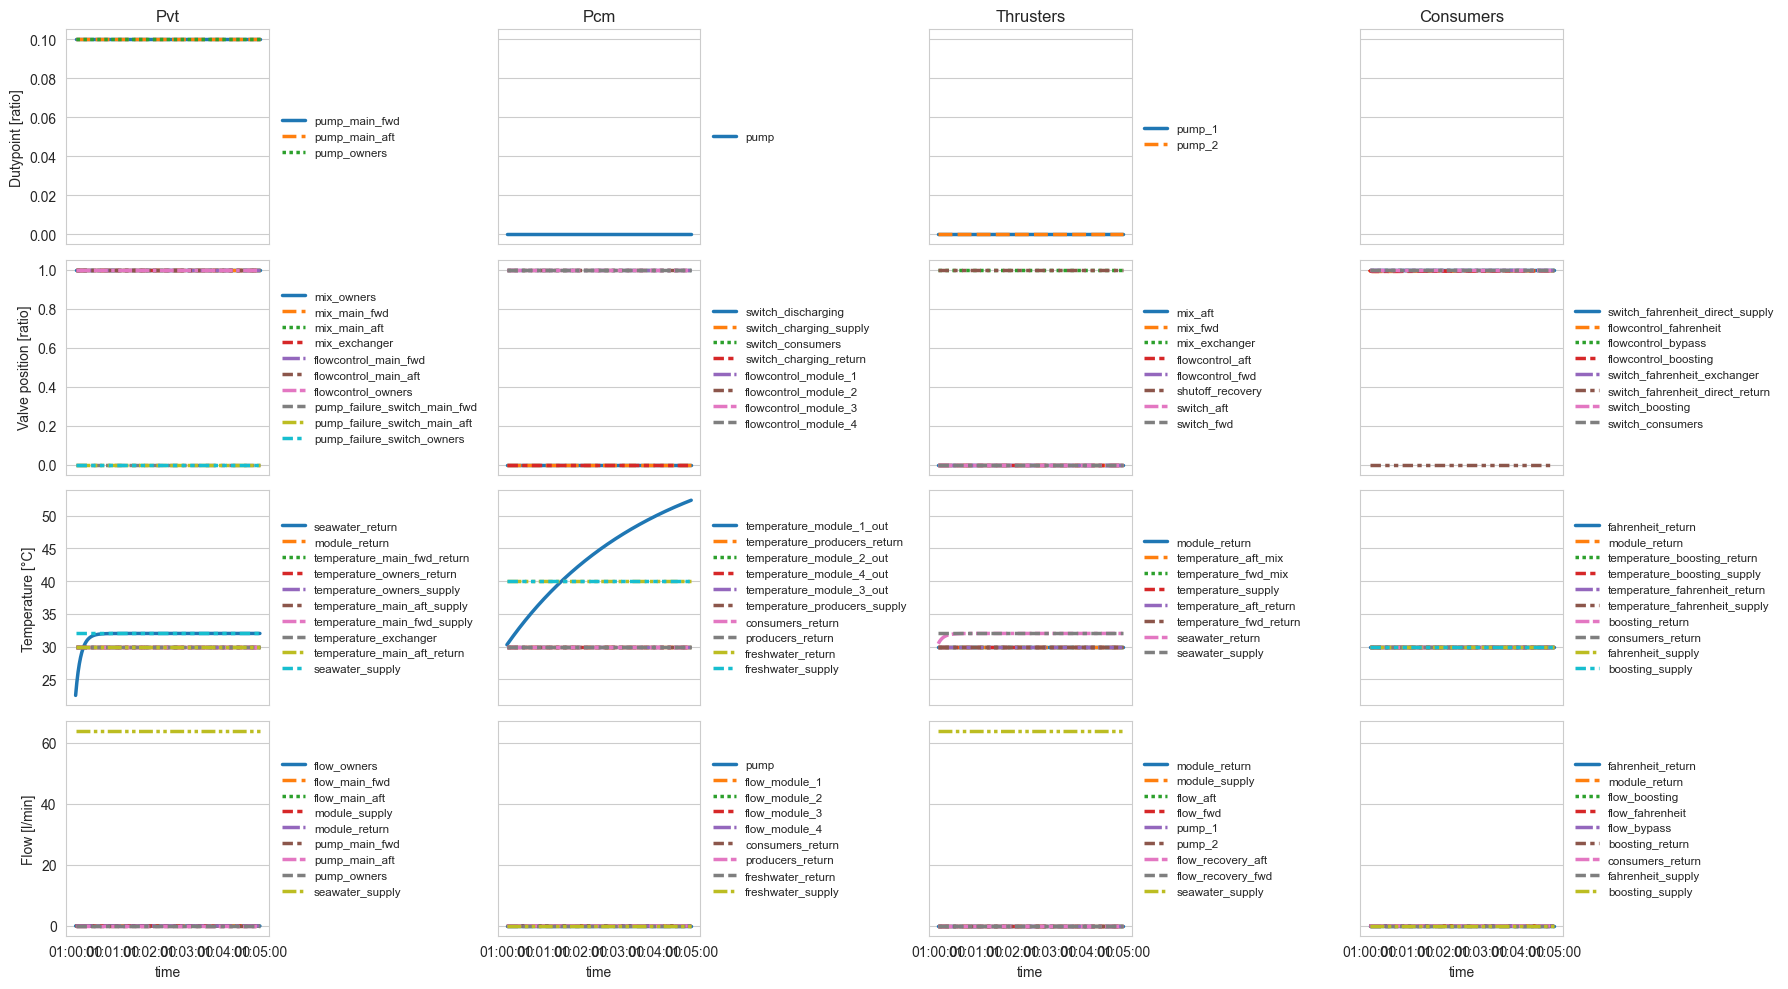

In [5]:
from analysis.analysis_utils import plot_result

plot_result(result, 'plots/high_temperature.png');